# Estimate MP parameters for Zimmer data

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.io import savemat

from otimage import io
from otimage.utils import plot_maxproj
from otimage.imagerep import mp_gaussian, reconstruct_image

### Load single frame to test on

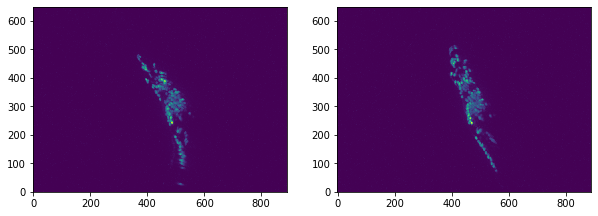

In [50]:
in_fpath = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
t_frame = 3

with io.ZimmerReader(in_fpath) as reader:
    img_1 = reader.get_frame(t_frame)
    img_2 = reader.get_frame(t_frame + 1)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plot_maxproj(img_1)

plt.subplot(122)
plot_maxproj(img_2);

### Set parameters

In [4]:
# Covariance values for each dimension
cov = np.diag([4.0, 4.0, 1.0])

# Number of MP iterations to run
n_iter = 10

### Run MP on image and plot results

In [5]:
pts, wts, _ = mp_gaussian(img, cov, n_iter)

In [6]:
img_recon = reconstruct_image(pts, [cov], wts, img.shape)

plt.figure(figsize=(15, 15))
    
plt.subplot(121)
plt.imshow(np.max(img, 2).T)
    
plt.subplot(122)
plt.imshow(np.max(img_recon, 2).T)

LinAlgError: singular matrix